In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyphare.pharesee.run import Run
from pyphare.pharesee.hierarchy import hierarchy_utils

# %matplotlib widget
%matplotlib inline

# Test charged mass density 1d

In [2]:
run_path = os.path.join(os.curdir, "nCheck_1d")
time = 0.0

In [3]:
r = Run(run_path)

In [4]:
h1 = r.GetMassDensity(time)
h2 = r.GetNi(time)

In [5]:
def densityMain(x):
    return 1.0

def densityBeam(x):
    L = 20.
    u = x/L-0.5
    return np.exp(-u**2)

masses = (2, 3)
charges = (1, 2)

In [6]:
def expected_mass_density_func(x, **kwargs):
    masses = kwargs["masses"]       # list of float : the ion pop masses
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    assert len(masses) == len(densities)
    funcs  = np.zeros((x.size, len(masses)))

    for i, (mass, density) in enumerate(zip(masses, densities)):
        funcs[:,i] = mass*density(x)
    
    return funcs.sum(axis=1)

In [7]:
def expected_charge_density_func(x, **kwargs):
    charges = kwargs["charges"]     # list of float : the ion pop charges
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    assert len(charges) == len(densities)

    funcs  = np.zeros((x.size, len(charges)))

    for i, (charge, density) in enumerate(zip(charges, densities)):
        funcs[:,i] = charge*density(x)
    
    return funcs.sum(axis=1)

In [8]:
def hierarchy_fromfunc(func, hier, **kwargs):
    from pyphare.pharesee.hierarchy.hierarchy_utils import compute_hier_from
    print(hier.ndim)

    def compute_(patch_datas, **kwargs):
        ref_name = next(iter(patch_datas.keys()))
        x_ = patch_datas[ref_name].x

        return (
            {"name": "value", "data": func(x_, **kwargs), "centering": patch_datas[ref_name].centerings},
        )

    return compute_hier_from(compute_, hier, **kwargs)

In [9]:
H1 = hierarchy_fromfunc(expected_mass_density_func, h1, masses=masses, densities=(densityMain, densityBeam))
H2 = hierarchy_fromfunc(expected_charge_density_func, h2, charges=charges, densities=(densityMain, densityBeam))

1
1


Text(0.5, 1.0, 'charge density : 1d')

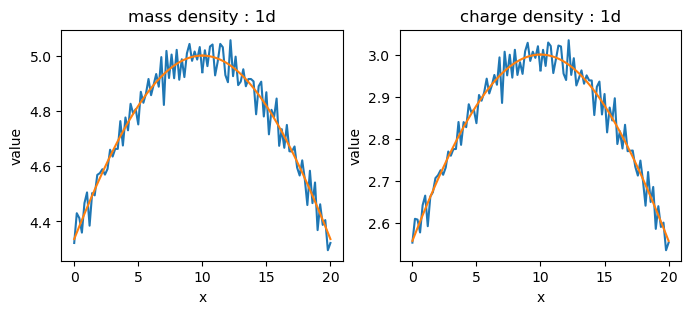

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

h1.plot(ax=ax1, ls="-", lw=2.0, color=cycle[0])
H1.plot(ax=ax1, ls="-", lw=2.0, color=cycle[1])

h2.plot(ax=ax2, ls="-", lw=2.0, color=cycle[0])
H2.plot(ax=ax2, ls="-", lw=2.0, color=cycle[1])

ax1.set_title("mass density : 1d")
ax2.set_title("charge density : 1d")

# Test charged mass density 2d

In [11]:
run_path = os.path.join(os.curdir, "nCheck_2d")
time = 0.0

In [12]:
r = Run(run_path)

In [13]:
h1 = r.GetMassDensity(time)
h2 = r.GetNi(time)

In [14]:
def densityMain(x, y):
    assert len(x) == len(y)
    return 1.0*np.ones_like(x)

def densityBeam(x, y):
    Lx = 24
    Ly = 20
    assert len(x) == len(y)
    u = x/Lx-0.5
    v = y/Ly-0.5
    return np.exp(-u**2-v**2)

masses = (2, 3)
charges = (1, 2)

In [15]:
def expected_mass_density_func(x, y, **kwargs):
    masses = kwargs["masses"]       # list of float : the ion pop masses
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    yv, xv = np.meshgrid(y, x)

    assert len(masses) == len(densities)
    funcs  = np.zeros((x.size, y.size, len(masses)))

    for i, (mass, density) in enumerate(zip(masses, densities)):
        funcs[:,:,i] = mass*density(xv, yv)
    
    return funcs.sum(axis=2)

In [16]:
def expected_charge_density_func(x, y, **kwargs):
    charges = kwargs["charges"]     # list of float : the ion pop charges
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    yv, xv = np.meshgrid(y, x)

    assert len(charges) == len(densities)
    funcs  = np.zeros((x.size, y.size, len(charges)))

    for i, (charge, density) in enumerate(zip(charges, densities)):
        funcs[:,:,i] = charge*density(xv, yv)
    
    return funcs.sum(axis=2)

In [17]:
def hierarchy_fromfunc(func, hier, **kwargs):
    from pyphare.pharesee.hierarchy.hierarchy_utils import compute_hier_from
    print(hier.ndim)

    def compute_(patch_datas, **kwargs):
        ref_name = next(iter(patch_datas.keys()))
        x_ = patch_datas[ref_name].x
        y_ = patch_datas[ref_name].y

        return (
            {"name": "value", "data": func(x_, y_, **kwargs), "centering": patch_datas[ref_name].centerings},
        )

    return compute_hier_from(compute_, hier, **kwargs)

In [18]:
H1 = hierarchy_fromfunc(expected_mass_density_func, h1, masses=masses, densities=(densityMain, densityBeam))
H2 = hierarchy_fromfunc(expected_charge_density_func, h1, charges=charges, densities=(densityMain, densityBeam))

2
2


Text(0.5, 1.0, 'expected mass density : 2d')

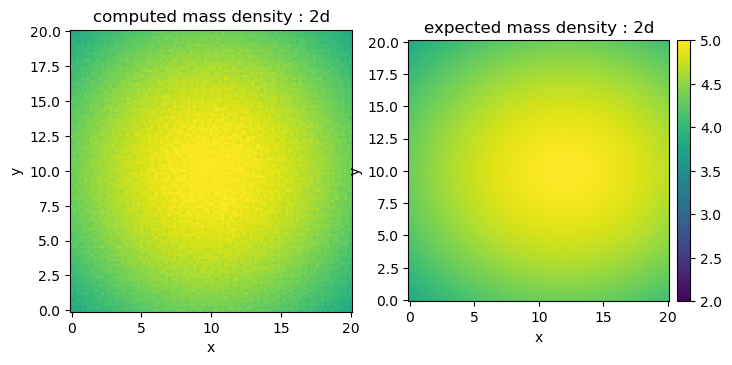

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

cmap = mpl.colormaps['viridis']

h1.plot(ax=ax1, vmin=2, vmax=5, cmap=cmap, cbar=False)
H1.plot(ax=ax2, vmin=2, vmax=5, cmap=cmap)

ax1.set_title("computed mass density : 2d")
ax2.set_title("expected mass density : 2d")

Text(0.5, 1.0, 'expected charge density : 2d')

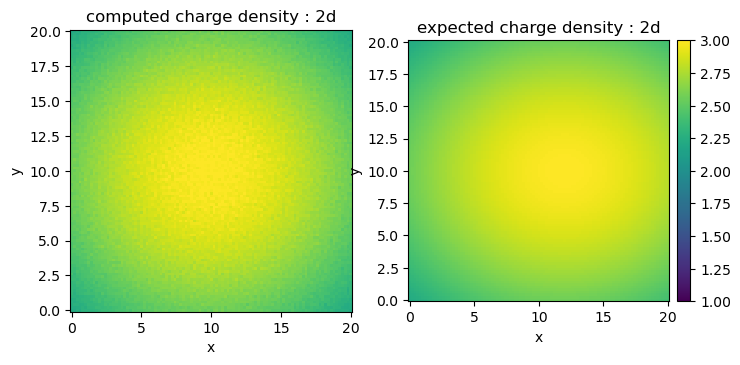

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

cmap = mpl.colormaps['viridis']

h2.plot(ax=ax1, vmin=1, vmax=3, cmap=cmap, cbar=False)
H2.plot(ax=ax2, vmin=1, vmax=3, cmap=cmap)

ax1.set_title("computed charge density : 2d")
ax2.set_title("expected charge density : 2d")

Text(0.5, 1.0, 'expected charge density : 2d')

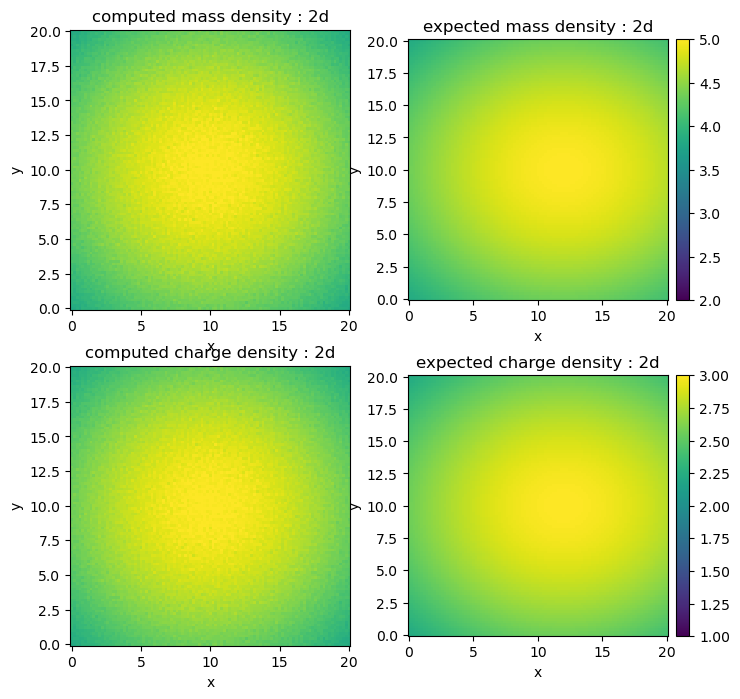

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

cmap = mpl.colormaps['viridis']

h1.plot(ax=ax1, vmin=2, vmax=5, cmap=cmap, cbar=False)
H1.plot(ax=ax2, vmin=2, vmax=5, cmap=cmap)
h2.plot(ax=ax3, vmin=1, vmax=3, cmap=cmap, cbar=False)
H2.plot(ax=ax4, vmin=1, vmax=3, cmap=cmap)

ax1.set_title("computed mass density : 2d")
ax2.set_title("expected mass density : 2d")
ax3.set_title("computed charge density : 2d")
ax4.set_title("expected charge density : 2d")

# Ready for the phare test

In [22]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pyphare.pharesee.run import Run
from pyphare.pharesee.hierarchy import hierarchy_from
from pyphare.pharesee.hierarchy.fromfunc import ions_mass_density_func1d
from pyphare.pharesee.hierarchy.fromfunc import ions_charge_density_func1d
from pyphare.pharesee.hierarchy.fromfunc import ions_mass_density_func2d
from pyphare.pharesee.hierarchy.fromfunc import ions_charge_density_func2d
from pyphare.pharesee.hierarchy.fromfunc import hierarchy_from_func

%matplotlib inline

In [23]:
run_path = os.path.join(os.curdir, "nCheck_1d")
time = 0.0

In [24]:
r = Run(run_path)

In [25]:
def densityMain(x):
    return 1.0

def densityBeam(x):
    L = 20.
    u = x/L-0.5
    return np.exp(-u**2)

masses = (2, 3)
charges = (1, 2)

In [26]:
h1 = r.GetMassDensity(time)
h2 = r.GetNi(time)

In [27]:
H1 = hierarchy_from(hier=h1, func=ions_mass_density_func1d, masses=masses, densities=(densityMain, densityBeam))
H2 = hierarchy_from(hier=h2, func=ions_charge_density_func1d, charges=charges, densities=(densityMain, densityBeam))

Text(0.5, 1.0, 'charge density : 1d')

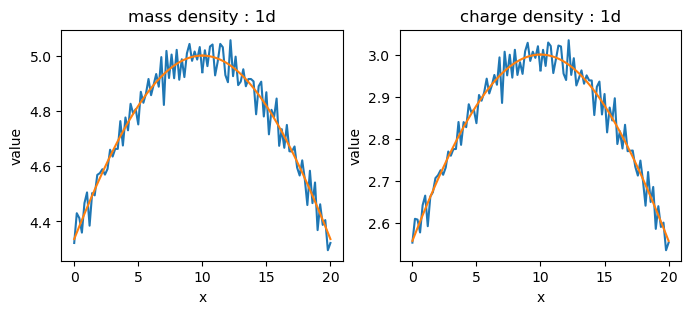

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

h1.plot(ax=ax1, ls="-", lw=2.0, color=cycle[0])
H1.plot(ax=ax1, ls="-", lw=2.0, color=cycle[1])

h2.plot(ax=ax2, ls="-", lw=2.0, color=cycle[0])
H2.plot(ax=ax2, ls="-", lw=2.0, color=cycle[1])

ax1.set_title("mass density : 1d")
ax2.set_title("charge density : 1d")

In [29]:
run_path = os.path.join(os.curdir, "nCheck_2d")
time = 0.0

In [30]:
r = Run(run_path)

In [31]:
def densityMain(x, y):
    assert len(x) == len(y)
    return 1.0*np.ones_like(x)

def densityBeam(x, y):
    Lx = 20
    Ly = 20
    assert len(x) == len(y)
    u = x/Lx-0.5
    v = y/Ly-0.5
    return np.exp(-u**2-v**2)

masses = (2, 3)
charges = (1, 2)

In [32]:
h1 = r.GetMassDensity(time)
h2 = r.GetNi(time)

In [33]:
H1 = hierarchy_from(hier=h1, func=ions_mass_density_func2d, masses=masses, densities=(densityMain, densityBeam))
H2 = hierarchy_from(hier=h2, func=ions_charge_density_func2d, charges=charges, densities=(densityMain, densityBeam))

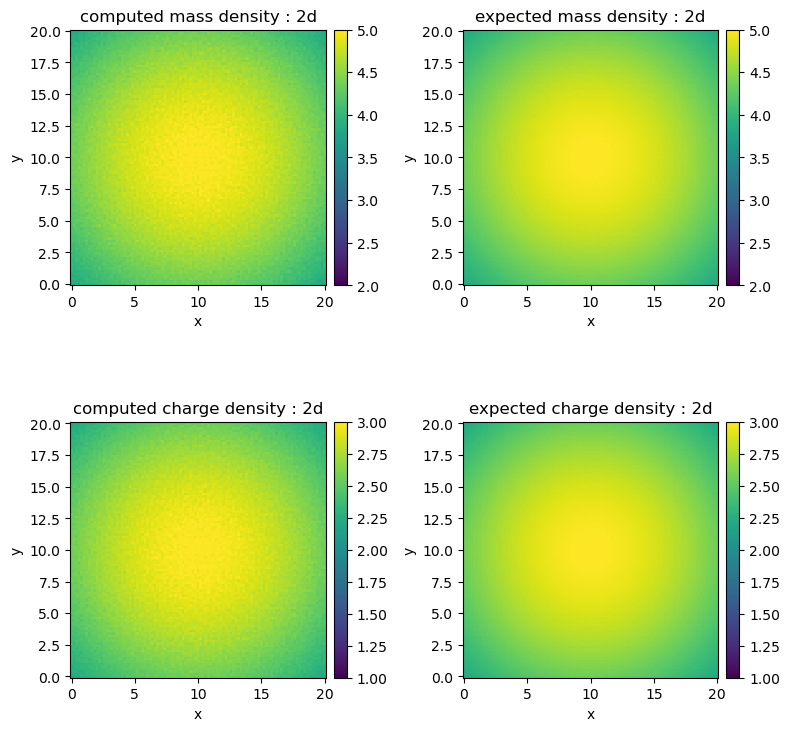

In [34]:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
    
    cmap = mpl.colormaps['viridis']
    
    h1.plot(ax=ax1, vmin=2, vmax=5, cmap=cmap, title="computed mass density : 2d")
    H1.plot(ax=ax2, vmin=2, vmax=5, cmap=cmap, title="expected mass density : 2d")
    h2.plot(ax=ax3, vmin=1, vmax=3, cmap=cmap, title="computed charge density : 2d")
    H2.plot(ax=ax4, vmin=1, vmax=3, cmap=cmap, title="expected charge density : 2d")
    
    plt.tight_layout()